<div class="alert alert-block alert-danger">

# Cluster Color Magnitude Diagram 

counts to instrumental to apparent to absolute to Bolometric to Luminosity

In [1]:
import numpy as np                       #numpy enables functions for data arrays
import matplotlib.pyplot as plt          #matplotlib enables plotting routines


##  Cluster DATA in *counts*:   $C_v$ vs. $C_b/C_v$

In [2]:
# load data, plot color - brightess

cluster = np.loadtxt("cluster.txt")
cluster_b = cluster[:,1]
cluster_v = cluster[:,2]
cluster_ratio = cluster_b/cluster_v

# Instrumental Magnitudes, plot Instrumental CMD
## $ m_{inst*} = -2.5 log(count)_*$

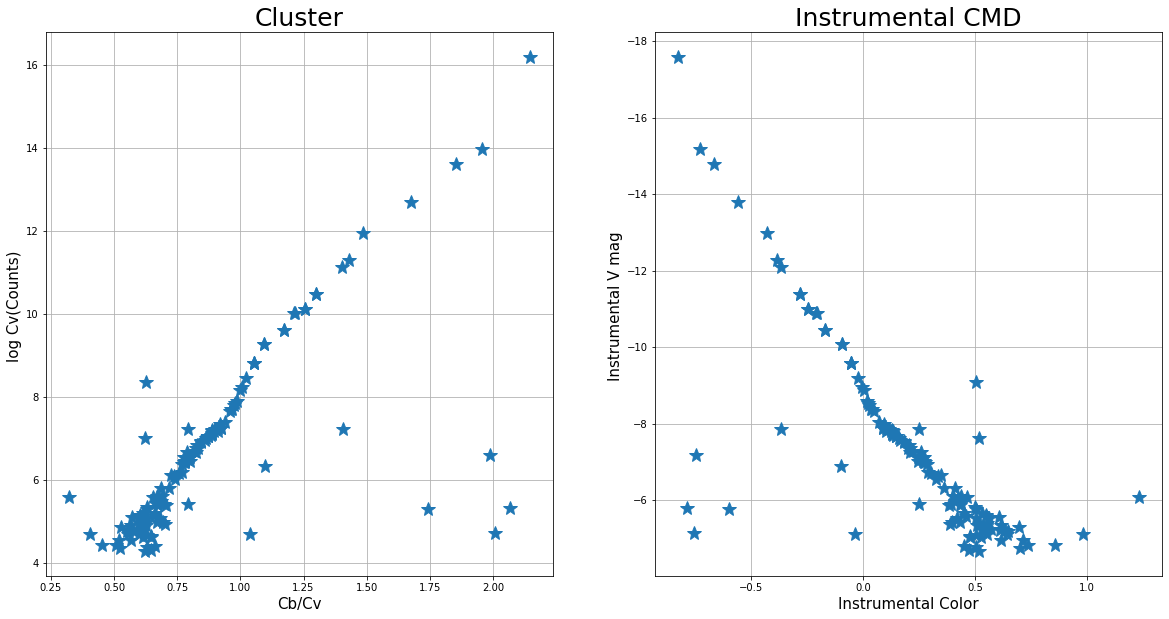

In [3]:
## calculate instrumental mag from Cv,Cb
## plot, flip y axis for instrumental V mag

m_inst_v = -2.5*np.log10(cluster_v)
m_inst_b = -2.5*np.log10(cluster_b)
#m_inst1 = -2.5*np.log10(cluster_ratio)
m_inst = m_inst_b - m_inst_v

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(cluster_ratio,np.log(cluster_v),'*', markersize = 15)
plt.ylabel("log Cv(Counts) ", size=15)
plt.xlabel("Cb/Cv",size=15)
plt.title('Cluster', size = 25)
plt.grid()

plt.subplot(1,2,2)
plt.plot(m_inst,m_inst_v,'*', markersize = 15)
plt.ylabel("Instrumental V mag ", size=15)
plt.xlabel("Instrumental Color",size=15)
plt.title('Instrumental CMD', size = 25)
plt.gca().invert_yaxis()
plt.grid()

plt.show()


## Transformation Coefficent from known standard 

### * B=6.23, V = 6.23
### * $C_b$ = 256779, $C_v$ = 168969
### * $ TC = appmag_{std} -  m_{inst-std}  $



In [4]:
# calculate TC
b = 6.23
v = 6.23
cb = 256779
cv = 168969
inst_std_b = -2.5*np.log10(cb)
inst_std_v = -2.5*np.log10(cv)

tc_b = b - inst_std_b
tc_v = v - inst_std_v

<div class="alert alert-block alert-danger">
    
# Apparent B,V Magnitudes for RGC 224, plot CMD 

## $ mag_* = TC + m_{inst*} $

In [5]:
mag_b = tc_b + m_inst_b
mag_v = tc_v + m_inst_v

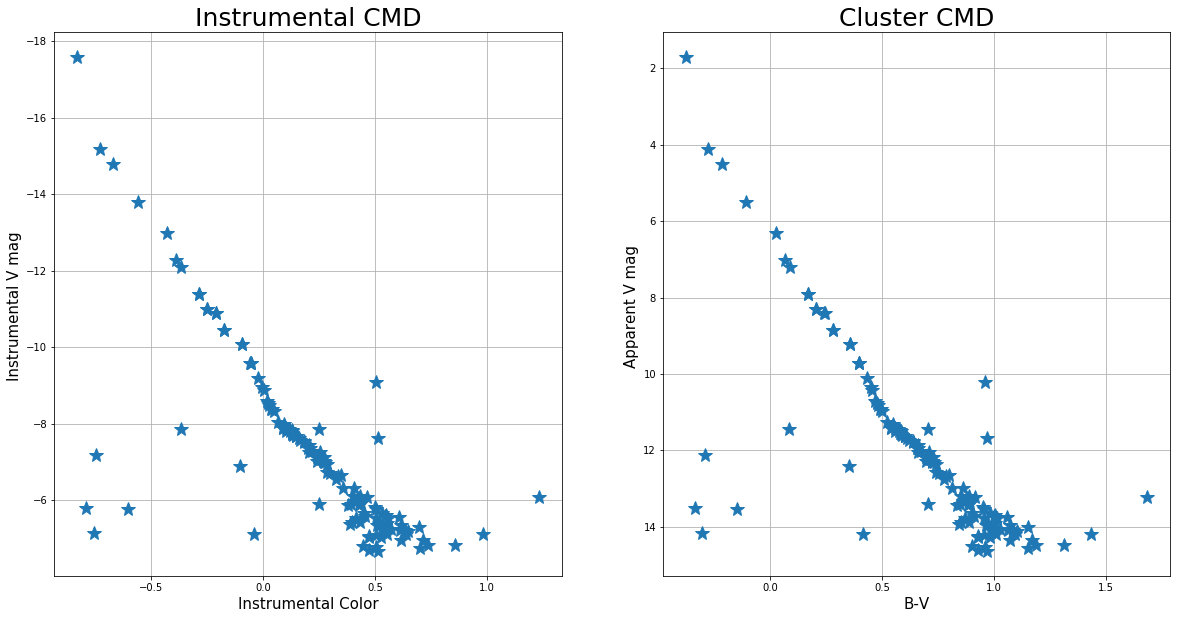

In [6]:
## calculate B,V
## plot CMD, flip y axis for apparent V mag
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(m_inst,m_inst_v,'*', markersize = 15)
plt.ylabel("Instrumental V mag ", size=15)
plt.xlabel("Instrumental Color",size=15)
plt.title('Instrumental CMD', size = 25)
plt.gca().invert_yaxis()
plt.grid()

plt.subplot(1,2,2)
plt.plot(mag_b-mag_v,mag_v,'*', markersize = 15)
plt.ylabel("Apparent V mag ", size=15)
plt.xlabel("B-V",size=15)
plt.title('Cluster CMD', size = 25)
plt.gca().invert_yaxis()
plt.grid()

plt.show()

<div class="alert alert-block alert-warning">

## Main Sequence Relation: $M_V$ vs B- V

In [7]:
colabsmag = np.loadtxt("colabsmag.txt")
Mv = colabsmag[:,0]
abso_B_V = colabsmag[:,1]

In [8]:
desired = 0
b_v = mag_b-mag_v
index = (np.abs(b_v-desired)).argmin()
print('index =',index)
print('value of mag_v = ',mag_v[index])

index = 71
value of mag_v =  6.309768453530712


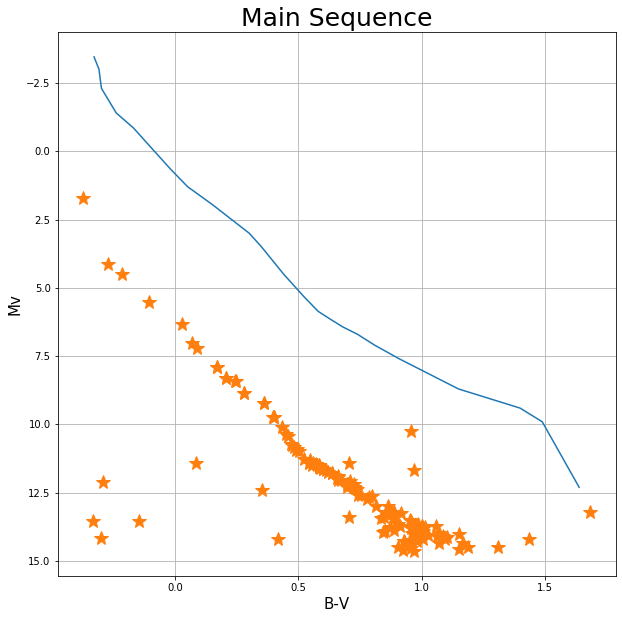

In [9]:
# load Main Sequence Relation,
## plot, flip y axis for magnitude

# find absolute V mag for all cluster stars from distance modulus
plt.figure(figsize=(10,10))

plt.plot(abso_B_V,Mv,'-', markersize = 15)
plt.plot(mag_b-mag_v,mag_v,'*', markersize = 15)
plt.ylabel("Mv", size=15)
plt.xlabel("B-V",size=15)
plt.title('Main Sequence', size = 25)
plt.gca().invert_yaxis()
plt.grid()

plt.show()

<div class="alert alert-block alert-warning">
    
# Distance Modulus $V- M_V$


In [10]:
# calculate distance modulus and distance in parsecs
DMv = mag_v[index] - 0.65
d = 10**((DMv + 5)/5)
print(d)

135.5044914731348


<div class="alert alert-block alert-danger">
    
# Absolute CMD for RGC 224 $M_V$  vs. B-V

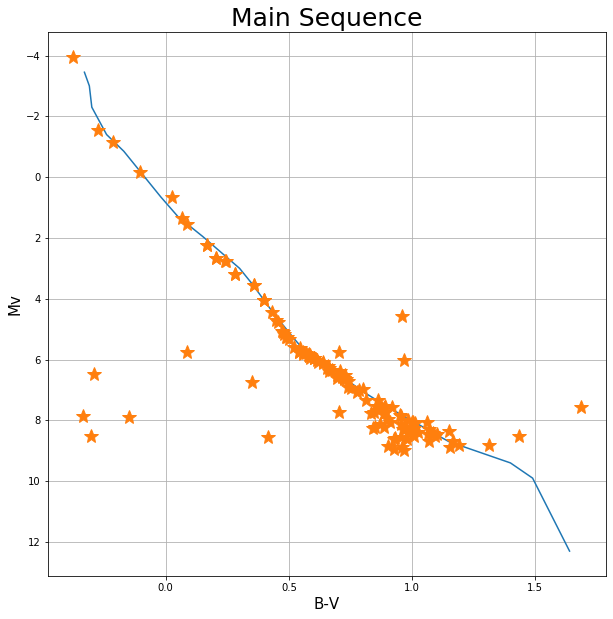

In [11]:
# load Main Sequence Relation,
## plot, flip y axis for magnitude
plt.figure(figsize=(10,10))

plt.plot(abso_B_V,Mv,'-', markersize = 15)
plt.plot(mag_b-mag_v,mag_v-DMv,'*', markersize = 15)
plt.ylabel("Mv", size=15)
plt.xlabel("B-V",size=15)
plt.title('Main Sequence', size = 25)
plt.gca().invert_yaxis()
plt.grid()

plt.show()

<div class="alert alert-block alert-danger">

# Bolometric Correction 


<div class="alert alert-block alert-warning">

# Need temperature for cluster stars 
### compute  Planck at B,V wavelengths
### Interpolate to get temps of cluster stars 

In [20]:
# constants cgs
h = 6.67e-27
c = 3e10
k = 1.38e-16
sig = 5.67e-5
nano= 1e-7                #convert nm to cm

temp = np.arange(2000, 50000, 200)         
#in nm unit
lambdaRange_nm = np.array([440,550])
#convert into cm
lambdaRange_cm = lambdaRange_nm*nano

Temp, WaveRange = np.meshgrid(temp,lambdaRange_cm)   

calc_top = 2*h*c**2
expo = (h*c)/(WaveRange*k*Temp)
calc_bot = (WaveRange**5)*(np.exp(expo)-1)
planck_result = calc_top/calc_bot
planck_bv = planck_result[0]/planck_result[1] 

####################
# Yo = np.interp (X_o, x, y) 
clustemp = np.interp(cluster_ratio,planck_bv,temp)

<div class="alert alert-block alert-warning">

# Calculate BC from T, plot vs. temperature

In [21]:
# calculate BC in magnitudes
logT = np.log10(clustemp)
BC = -8.499*(logT-4)**4 + 13.421*(logT-4)**3 - 8.131*(logT-4)**2 - 3.901*(logT-4) - 0.438

<div class="alert alert-block alert-warning">
    
# Bolometric Magnitude : $ M_{bol} = M_V + BC$

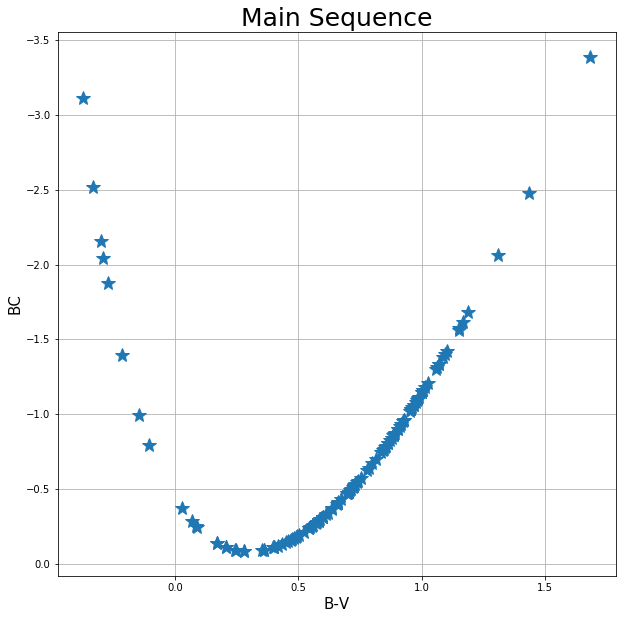

In [38]:
## plot BC vs B-V, flip y axis
M_bol = mag_v + BC

plt.figure(figsize=(10,10))

plt.plot(mag_b-mag_v,BC,'*', markersize = 15)
plt.ylabel("BC", size=15)
plt.xlabel("B-V",size=15)
plt.title('Main Sequence', size = 25)
plt.gca().invert_yaxis()
plt.grid()

plt.show()

It makes sense. When the stars have similar brightness in b and v filter, BC is small, because the peak is nearby v filter. Otherwise, the BC is big.

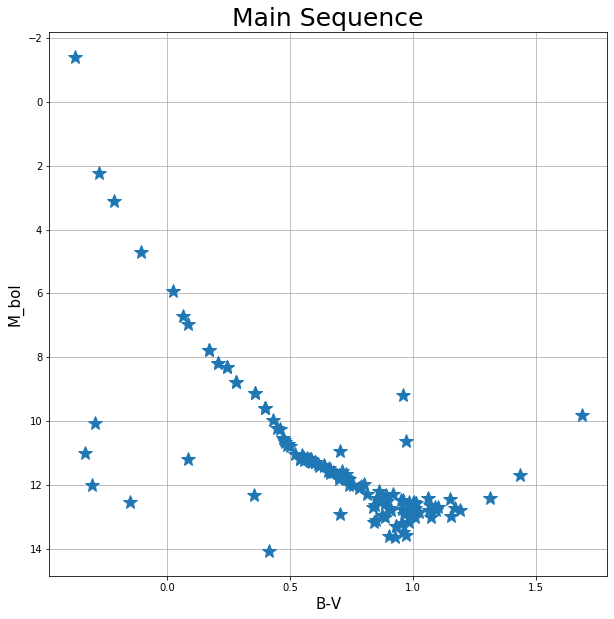

In [24]:
## plot Mbol vs B-V, flip y axis
M_bol = mag_v + BC

plt.figure(figsize=(10,10))

plt.plot(mag_b-mag_v,M_bol,'*', markersize = 15)
plt.ylabel("M_bol", size=15)
plt.xlabel("B-V",size=15)
plt.title('Main Sequence', size = 25)
plt.gca().invert_yaxis()
plt.grid()

plt.show()

<div class="alert alert-block alert-danger">

# Luminosity from $M_{bol}$ : 
## $M_{bolsun}$ - $M_{bol*}$ = $2.5 log (L_*/L_{sun})$

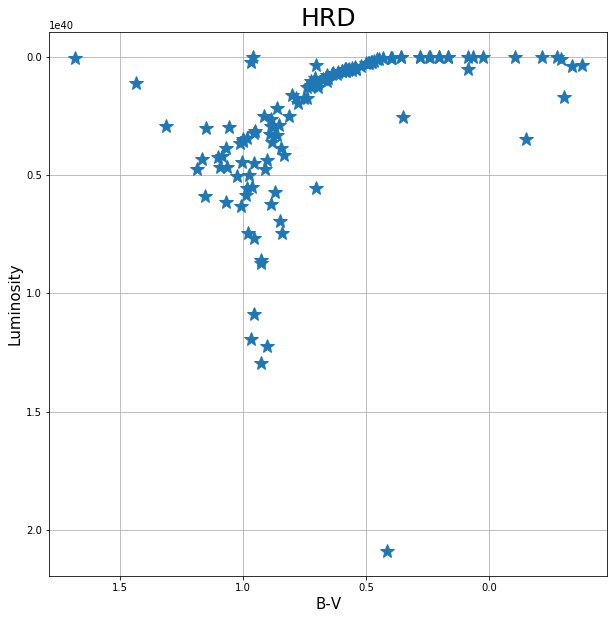

In [37]:
Mbol_sun = 4.75
L_sun = 4*10e33
L_ratio_log = ((Mbol_sun - M_bol)/2.5)
L_ratio = L_ratio_log**10
L = L_ratio*L_sun
# plot L,T HRD, flip x AND y axis
plt.figure(figsize=(10,10))

plt.plot(mag_b-mag_v, L,'*', markersize = 15)
plt.ylabel("Luminosity", size=15)
plt.xlabel("B-V",size=15)
plt.title('HRD', size = 25)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid()

plt.show()


Most cluster stars are dimmer than the sun. For the stars that are dimmer than the sun, the bluer ones tend to have lower luminosity.